In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime as dt

## 3. Asking meaningful question


In [18]:
df = pd.read_csv('./data/NYPD_Arrest_Data__Year_to_Date_.csv')
df.head(5)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,263238742,02/08/2023,380.0,"ROBBERY,CAR JACKING",105.0,ROBBERY,PL 1601003,F,K,62,0,25-44,F,WHITE,989904,156928,40.597407,-73.979638,POINT (-73.979638 40.597407)
1,265590985,03/24/2023,155.0,RAPE 2,104.0,RAPE,PL 1303001,F,S,120,0,18-24,M,BLACK,962873,174172,40.644721,-74.077033,POINT (-74.0770327198983 40.6447209438691)
2,265798132,03/28/2023,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,S,120,0,25-44,M,BLACK,962873,174172,40.644721,-74.077033,POINT (-74.0770327198983 40.6447209438691)
3,269233687,06/02/2023,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,Q,110,0,25-44,M,WHITE HISPANIC,1019164,210169,40.743481,-73.874004,POINT (-73.8740035373971 40.7434812638841)
4,270519574,06/28/2023,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,84,0,25-44,M,BLACK HISPANIC,988902,192641,40.695439,-73.983225,POINT (-73.9832253756043 40.6954388081238)


In [19]:
df.dtypes

ARREST_KEY                    int64
ARREST_DATE                  object
PD_CD                       float64
PD_DESC                      object
KY_CD                       float64
OFNS_DESC                    object
LAW_CODE                     object
LAW_CAT_CD                   object
ARREST_BORO                  object
ARREST_PRECINCT               int64
JURISDICTION_CODE             int64
AGE_GROUP                    object
PERP_SEX                     object
PERP_RACE                    object
X_COORD_CD                    int64
Y_COORD_CD                    int64
Latitude                    float64
Longitude                   float64
New Georeferenced Column     object
dtype: object

### 3 What is the crime distribution across the year?

#### 3.1 Preprocess data

In [20]:
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'], format='%m/%d/%Y')

We changed the date format so we could analyze the data more precisely.

##### 3.2 Analyze Data

The data has only updated to June, so we will explore top 5 crimes in each month.

In [21]:
df['Month'] = df['ARREST_DATE'].dt.month
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
                 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}

df['Month'] = df['Month'].map(month_mapping)

monthly_crime_counts = df.groupby(['Month', 'OFNS_DESC']).size().reset_index(name='CrimeCount')
monthly_crime_counts.sort_values(['Month', 'CrimeCount'], ascending=[True, False], inplace=True)

top5_crimes_by_month = monthly_crime_counts.groupby(['Month'])
print(top5_crimes_by_month)

       Month                     OFNS_DESC  CrimeCount
119  January  ASSAULT 3 & RELATED OFFENSES        2646
159  January                 PETIT LARCENY        2072
130  January                FELONY ASSAULT        1744
126  January               DANGEROUS DRUGS        1261
145  January       MISCELLANEOUS PENAL LAW        1191


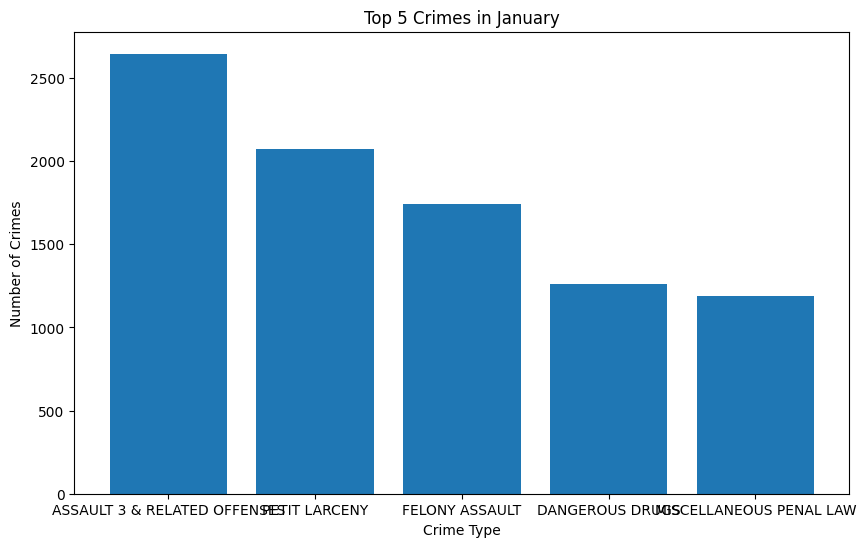

In [22]:
top5_crimes_january = monthly_crime_counts[monthly_crime_counts['Month'] == 'January'].head(5)

# Display the top 5 crimes for January
print(top5_crimes_january)

# Plotting the top 5 crimes for January
plt.figure(figsize=(10, 6))
plt.bar(top5_crimes_january['OFNS_DESC'], top5_crimes_january['CrimeCount'])
plt.title('Top 5 Crimes in January')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3212\2063659975.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top5_crimes_month['OFNS_DESC'], rotation=45, ha='right', fontsize=7,  weight = 'bold')


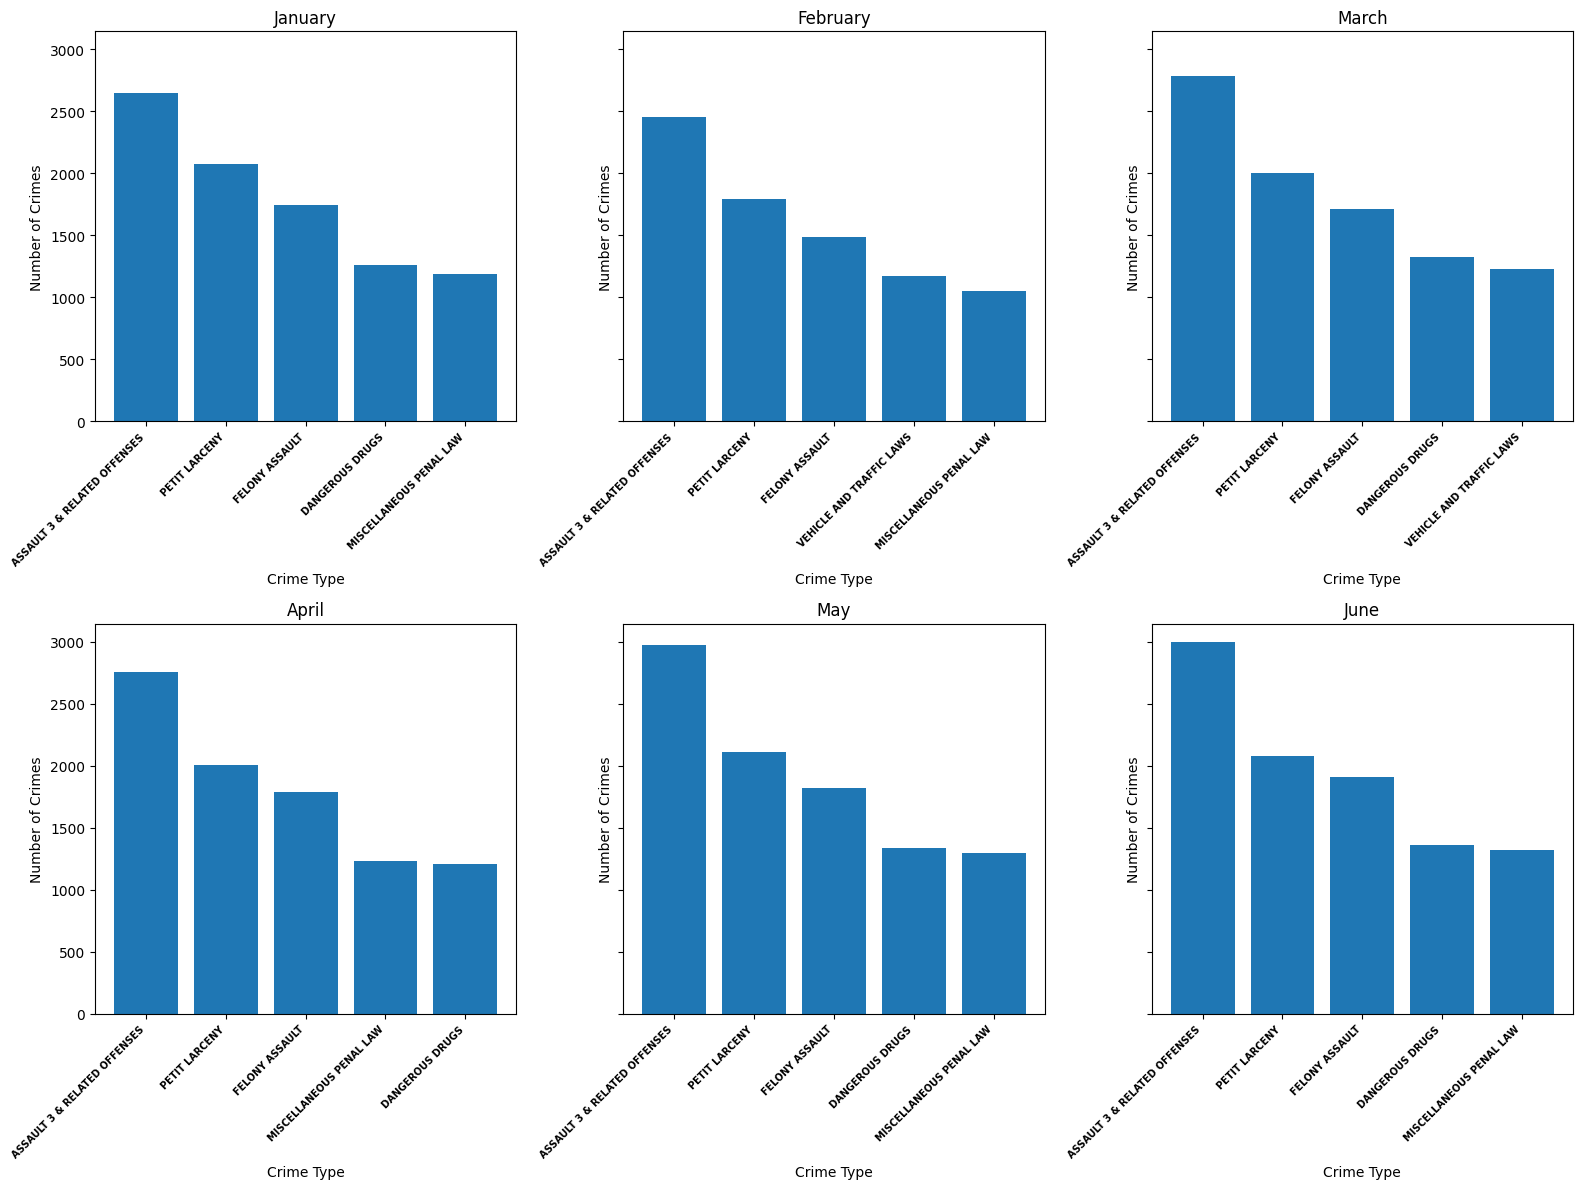

In [23]:
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

# Extract month and year from the 'ARREST_DATE' column
df['Month'] = df['ARREST_DATE'].dt.month

# Map month numbers to month names
month_mapping = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June'}

df['Month'] = df['Month'].map(month_mapping)

# Group by month and crime description, count occurrences, and sort the values
monthly_crime_counts = df.groupby(['Month', 'OFNS_DESC']).size().reset_index(name='CrimeCount')
monthly_crime_counts.sort_values(['Month', 'CrimeCount'], ascending=[True, False], inplace=True)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12), sharey=True, tight_layout=True)
axes = axes.flatten()

for i, month in enumerate(month_mapping.values(), 1):
    top5_crimes_month = monthly_crime_counts[monthly_crime_counts['Month'] == month].head(5)
    
    ax = axes[i - 1]
    ax.bar(top5_crimes_month['OFNS_DESC'], top5_crimes_month['CrimeCount'])
    ax.set_title(month)
    ax.set_xlabel('Crime Type')
    ax.set_ylabel('Number of Crimes')
    ax.set_xticklabels(top5_crimes_month['OFNS_DESC'], rotation=45, ha='right', fontsize=7,  weight = 'bold')
# Show the plot
plt.show()


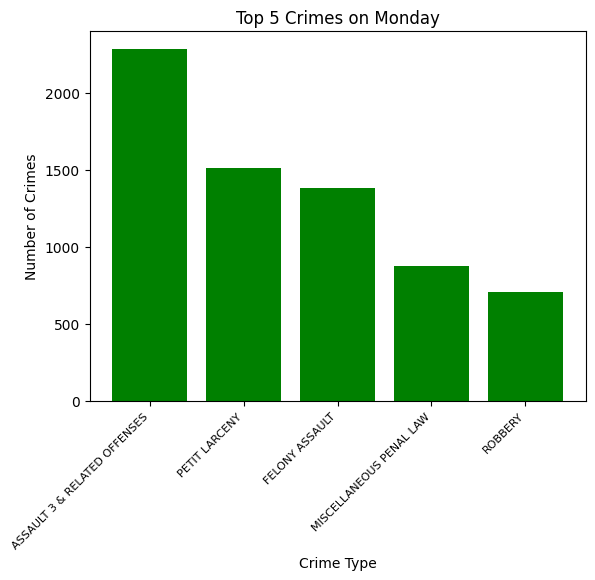

In [24]:
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])
df['DayOfWeek'] = df['ARREST_DATE'].dt.day_name()

monday_data = df[df['DayOfWeek'] == 'Monday']
top_crimes_monday = monday_data['OFNS_DESC'].value_counts().head(5)
plt.bar(top_crimes_monday.index, top_crimes_monday.values, color='green')
plt.title('Top 5 Crimes on Monday')
plt.xlabel('Crime Type')
plt.ylabel('Number of Crimes')

plt.xticks(rotation=45, ha='right', fontsize=8)

plt.show()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_3212\1739791535.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)


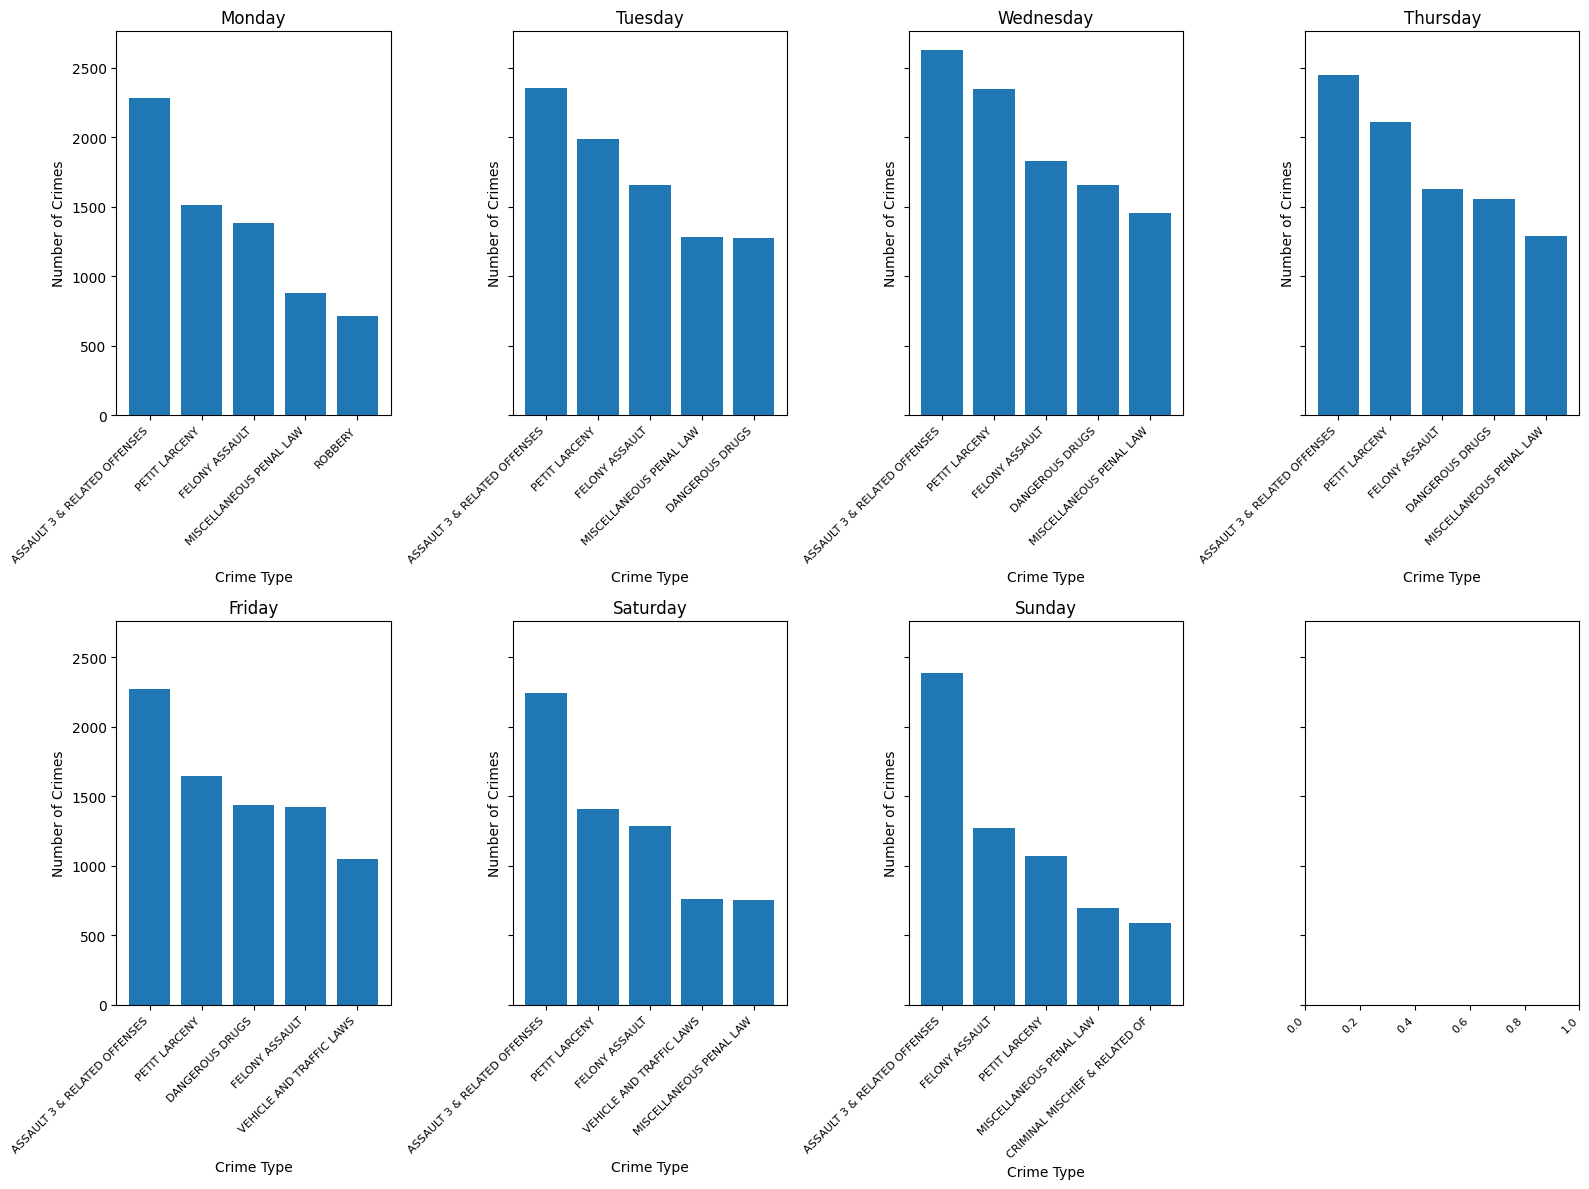

In [25]:
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE'])

df['DayOfWeek'] = df['ARREST_DATE'].dt.day_name()

weekly_crime_counts = df.groupby(['DayOfWeek', 'OFNS_DESC']).size().reset_index(name='CrimeCount')
weekly_crime_counts.sort_values(['DayOfWeek', 'CrimeCount'], ascending=[True, False], inplace=True)

sorted_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 12), sharey=True, tight_layout=True)
axes = axes.flatten()

for i, day in enumerate(sorted_days):
    top5_crimes_day = weekly_crime_counts[weekly_crime_counts['DayOfWeek'] == day].head(5)
    
    ax = axes[i]
    ax.bar(top5_crimes_day['OFNS_DESC'], top5_crimes_day['CrimeCount'])
    ax.set_title(day)
    ax.set_xlabel('Crime Type')
    ax.set_ylabel('Number of Crimes')
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)
plt.show()


### 4 Crime situation across each precinct and borough
#### 4.1 Preprocess data

In [26]:
df['ARREST_BORO'] = df['ARREST_BORO'].replace('K', 'Brooklyn')
df['ARREST_BORO'] = df['ARREST_BORO'].replace('B', 'Bronx')
df['ARREST_BORO'] = df['ARREST_BORO'].replace('M', 'Manhattan')
df['ARREST_BORO'] = df['ARREST_BORO'].replace('Q', 'Queens')
df['ARREST_BORO'] = df['ARREST_BORO'].replace('S', 'Staten Island')

We replaced the value in column 'ARREST_BORO' so it can be easier for us to grasp the data.

#### 4.2 Analyze data

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3212\3226321074.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'nybb' data from the geodatasets package.

from geodatasets import get_path
path_to_file = get_path('nybb')

  gdf_ny = gpd.read_file(gpd.datasets.get_path('nybb'))


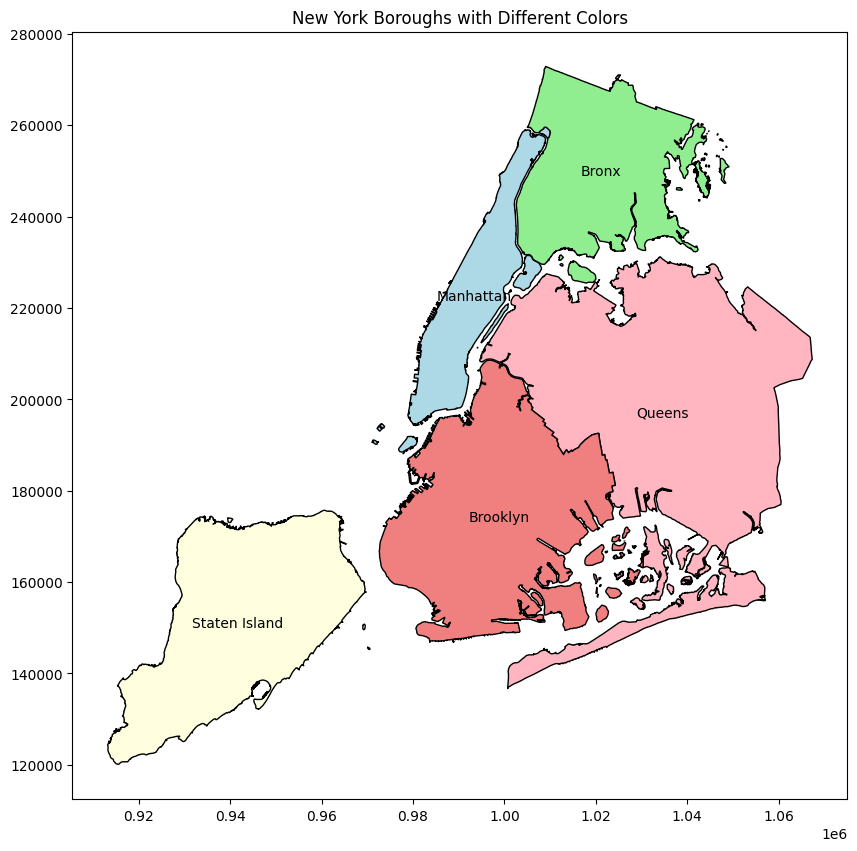

In [27]:
gdf_ny = gpd.read_file(gpd.datasets.get_path('nybb'))

colors = {'Manhattan': 'lightblue', 'Bronx': 'lightgreen', 'Brooklyn': 'lightcoral', 'Staten Island': 'lightyellow', 'Queens': 'lightpink'}

ax = gdf_ny.plot(edgecolor='black', figsize=(10, 10), color=[colors[boro] for boro in gdf_ny['BoroName']])

for x, y, label in zip(gdf_ny.geometry.centroid.x, gdf_ny.geometry.centroid.y, gdf_ny['BoroName']):
    ax.text(x, y, label, fontsize=10, ha='center', va='center')

plt.title('New York Boroughs with Different Colors')
plt.show()

In [28]:
precinct_dict = {'Manhattan': [1, 5, 6, 7, 9, 10, 13, 14, 17, 18, 19, 20, 34],
                 'Bronx': [22, 23, 24, 25, 26, 28, 30, 32, 33],
                 'Brooklyn': [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 60, 61, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76,
                              77, 78, 79, 81, 83, 84, 88, ],
                 'Staten Island': [62, 63, 120, 121, 122, 123],
                 'Queens': [90, 94, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115]}

[Text(0, 0, 'Brooklyn'),
 Text(1, 0, 'Bronx'),
 Text(2, 0, 'Manhattan'),
 Text(3, 0, 'Queens'),
 Text(4, 0, 'Staten Island')]

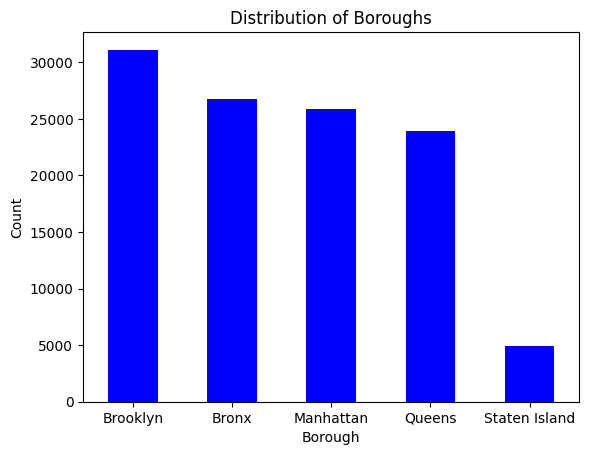

In [29]:
borough_counts = df['ARREST_BORO'].value_counts()

# Plotting the bar chart
ax = borough_counts.plot(kind='bar', color='blue')
plt.title('Distribution of Boroughs')
plt.xlabel('Borough')
plt.ylabel('Count')

# for i, v in enumerate(borough_counts):
#     ax.text(i, v + 0.1, str(v), ha='center', va='bottom')

# Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=360, ha='center')


In [30]:
top_crimes_by_boro = df.groupby('ARREST_BORO')['OFNS_DESC'].value_counts().groupby(level=0, group_keys=False).nlargest(5)
top_crimes_by_boro

ARREST_BORO    OFNS_DESC                   
Bronx          ASSAULT 3 & RELATED OFFENSES    4530
               FELONY ASSAULT                  2749
               PETIT LARCENY                   2582
               VEHICLE AND TRAFFIC LAWS        1675
               DANGEROUS DRUGS                 1563
Brooklyn       ASSAULT 3 & RELATED OFFENSES    4416
               FELONY ASSAULT                  2933
               PETIT LARCENY                   2686
               MISCELLANEOUS PENAL LAW         2611
               VEHICLE AND TRAFFIC LAWS        2103
Manhattan      PETIT LARCENY                   4218
               ASSAULT 3 & RELATED OFFENSES    3254
               DANGEROUS DRUGS                 2349
               GRAND LARCENY                   2083
               FELONY ASSAULT                  1953
Queens         ASSAULT 3 & RELATED OFFENSES    3780
               FELONY ASSAULT                  2397
               PETIT LARCENY                   2086
               MISCE

C:\Users\Administrator\AppData\Local\Temp\ipykernel_3212\3880047944.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_crimes_boroughs['OFNS_DESC'], rotation=45, ha='right', fontsize=7,  weight = 'bold')


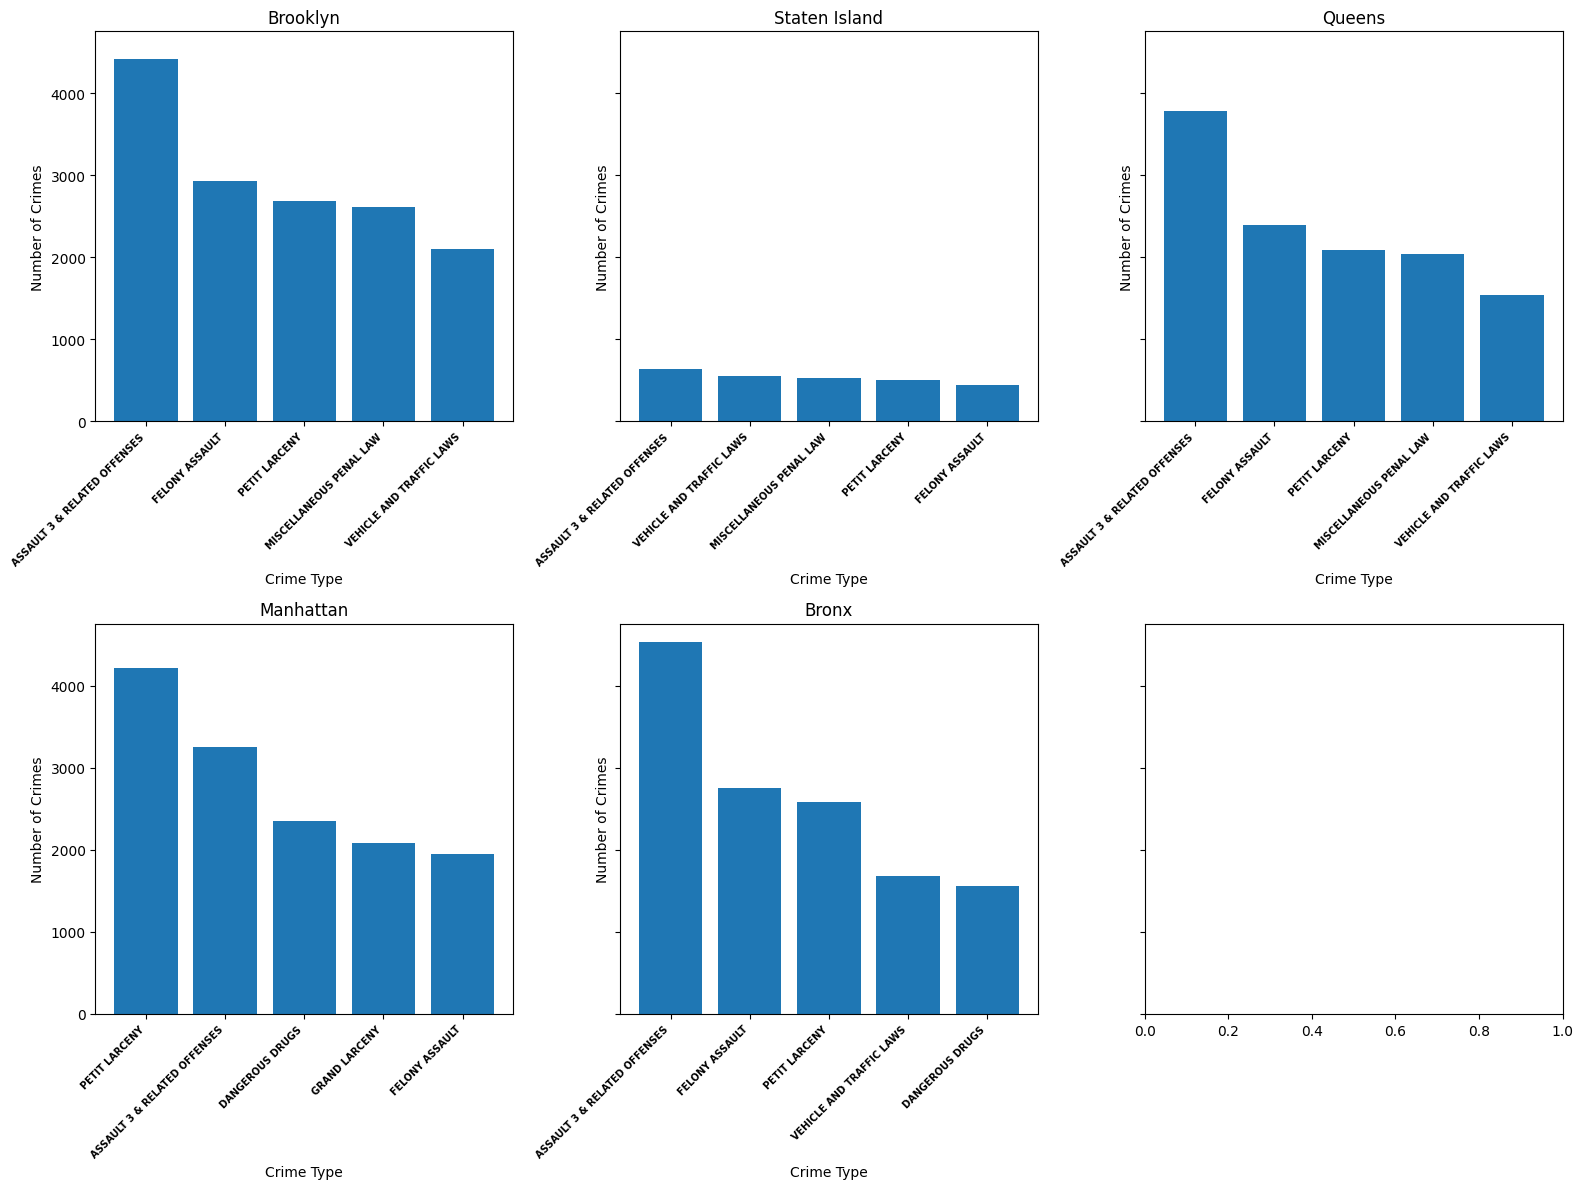

In [31]:
borough_crime_counts = df.groupby(['ARREST_BORO', 'OFNS_DESC']).size().reset_index(name='CrimeCount')
borough_crime_counts.sort_values(['ARREST_BORO', 'CrimeCount'], ascending=[True, False], inplace=True)

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 12), sharey=True, tight_layout=True)
axes = axes.flatten()

for i, borough in enumerate(df['ARREST_BORO'].unique(), 1):
    top_crimes_boroughs = borough_crime_counts[borough_crime_counts['ARREST_BORO'] == borough].head(5)
    
    ax = axes[i - 1]
    ax.bar(top_crimes_boroughs['OFNS_DESC'], top_crimes_boroughs['CrimeCount'])
    ax.set_title(borough)
    ax.set_xlabel('Crime Type')
    ax.set_ylabel('Number of Crimes')
    ax.set_xticklabels(top_crimes_boroughs['OFNS_DESC'], rotation=45, ha='right', fontsize=7,  weight = 'bold')
# Show the plot
plt.show()


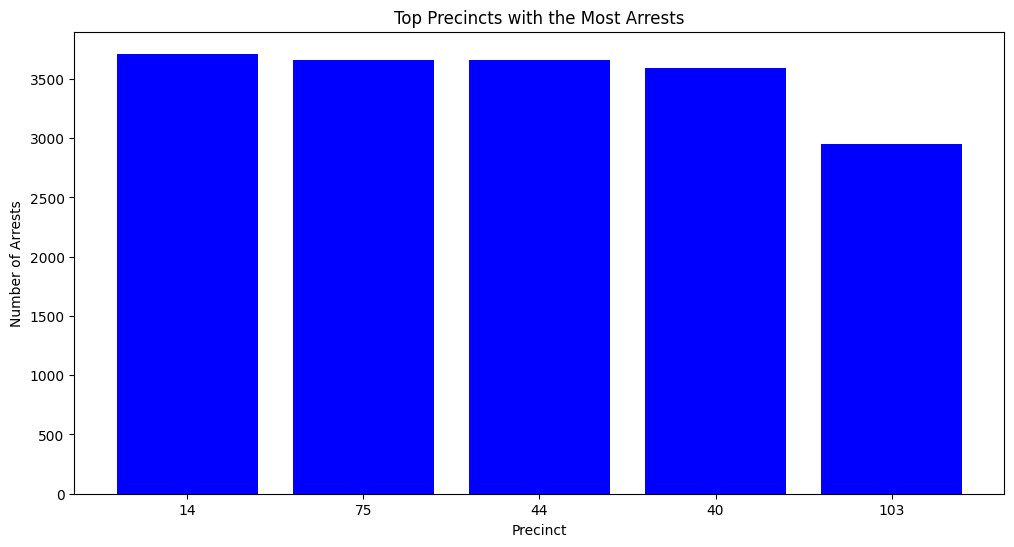

In [32]:
precinct_arrests = df['ARREST_PRECINCT'].value_counts().reset_index(name='ArrestCount').rename(columns={'index': 'Precinct'})

# Sort by the number of arrests in descending order to get the top precincts
top_precincts = precinct_arrests.sort_values(by='ArrestCount', ascending=False).head(5)

# Plotting the top precincts with the most arrests
plt.figure(figsize=(12, 6))
plt.bar(top_precincts['ARREST_PRECINCT'].astype(str), top_precincts['ArrestCount'], color='blue')
plt.title('Top Precincts with the Most Arrests')
plt.xlabel('Precinct')
plt.ylabel('Number of Arrests')

# Show the plot
plt.show()
